# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split  
from sklearn import metrics

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
bikes.shape

(10886, 12)

In [7]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [8]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

No hay diferencias significativas entre el promedio de alquiler de bicicletas entre los dias laborales y festivos

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Las  horas de mayor concentración son las 8 am, las 5 pm y 6 pm. Esto puede estar asociado a la entrada y salida del trabajo

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

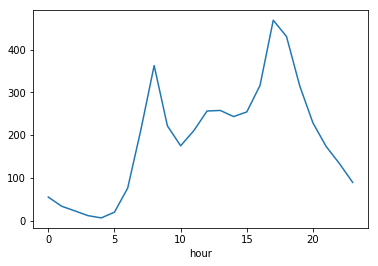

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

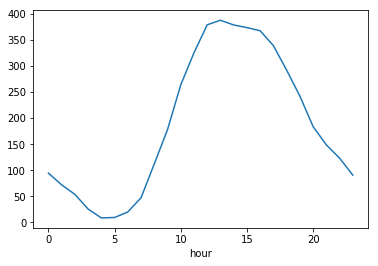

In [11]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

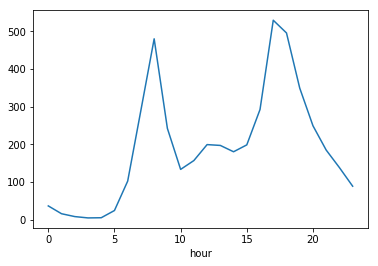

In [12]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

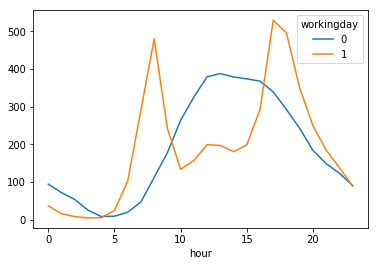

In [13]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

Los picos evidenciados en la tabla del punto anterior se deben al día laboral, entrada y salida del trabajo. 

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [14]:
X=bikes[['hour','workingday']]
y=bikes['total']
#Train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
clf1 = LinearRegression()
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 161.72449943612682


In [87]:
list(zip(clf1.coef_, X.columns))

[(10.406649564001238, 'workingday'), (4.9649681274743145, 'hour')]

Un aumento en la hora implica un aumento en 4.96 en cantidad de bicicletas alquiladas, si el día es hábil, hay en promedio 10.4 bicicletas alquiladas de más. Dado estos resultados y con base en las gráficas analizadas en pasos anteriores, se puede concluir que no existe una relación lineal entre las variables predictoras y la variable a predecir, tanto el error es muy grande y no se recomienda usar la regresión lineal para este modelo.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [16]:
def error_hora(train, hour):
    train['pred'] = train.loc[train.hour<hour, 'total'].mean()
    train.loc[train.hour>=hour, 'pred'] = train.loc[train.hour>=hour, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)

def error_workingday(train, workingday):
    train['pred'] = train.loc[train.workingday<workingday, 'total'].mean()
    train.loc[train.workingday>=workingday, 'pred'] = train.loc[train.workingday>=workingday, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)
   

In [17]:
for hour in bikes.hour.unique():
    print('hour ',hour)
    error_hora(bikes, hour)
print('----------------------------------')  
for workingday in bikes.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes, workingday)      

hour  0
181.13613357426559
hour  1
178.88076030483188
hour  2
175.61266024769844
hour  3
171.5350162975495
hour  4
166.57596568309665
hour  5
160.50832916137819
hour  6
154.10979930228774
hour  7
150.22560060405686
hour  8
153.86972728404965
hour  9
163.39221989024873
hour  10
165.25615391972227
hour  11
165.00286510437286
hour  12
165.84659205524616
hour  13
168.04756019190663
hour  14
169.94604099621912
hour  15
171.14521362143498
hour  16
172.47403631919644
hour  17
175.2235068708682
hour  18
179.8668827954335
hour  19
181.12705316323988
hour  20
180.44126246625746
hour  21
179.7297936918192
hour  22
179.51222338944388
hour  23
179.87454650980683
----------------------------------
workingday 0
181.13613357426559
workingday 1
181.12395921110544


In [18]:
bikes_izq = bikes.loc[bikes.hour<7].copy()
bikes_der = bikes.loc[bikes.hour>=7].copy()

In [19]:
# Nodo Izq
bikes_eval=bikes_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)    

hour  0
39.56714516247788
hour  1
38.46175887834954
hour  2
38.827302356307555
hour  3
39.34538405588436
hour  4
39.534113157382144
hour  5
38.30948200125475
hour  6
35.24426946227024
----------------------------------
workingday 0
39.56714516247788
workingday 1
39.18093811435608


In [20]:
bikes_izq_izq = bikes_izq.loc[bikes_izq.hour<6].copy()
bikes_izq_der = bikes_izq.loc[bikes_izq.hour>=6].copy()

In [21]:
bikes_izq_izq.shape,bikes_izq_der.shape

((2684, 13), (455, 13))

In [22]:
# Nodo Izq-Izq
bikes_eval=bikes_izq_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)    

hour  0
30.753540668567577
hour  1
27.614237275202125
hour  2
27.46590337533093
hour  3
28.171307299972213
hour  4
29.557984864071205
hour  5
30.657024737799514
----------------------------------
workingday 0
30.753540668567577
workingday 1
27.86868086542797


In [23]:
bikes_izq_izq_izq = bikes_izq_izq.loc[bikes_izq_izq.hour<2].copy()
bikes_izq_izq_der = bikes_izq_izq.loc[bikes_izq_izq.hour>=2].copy()

In [24]:
# Nodo Izq-Izq Izq
bikes_eval=bikes_izq_izq_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   

hour  0
40.538959119681785
hour  1
39.117819478677326
----------------------------------
workingday 0
40.538959119681785
workingday 1
30.694005806108365


In [25]:
bikes_izq_izq_izq_izq = bikes_izq_izq_izq.loc[bikes_izq_izq_izq.workingday==0].copy()
bikes_izq_izq_izq_der = bikes_izq_izq_izq.loc[bikes_izq_izq_izq.workingday==1].copy()

In [26]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_izq_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  0
42.685635151369894
hour  1
41.16560620668486
----------------------------------
workingday 0
42.685635151369894


In [27]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_izq_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  0
23.018939000078593
hour  1
20.55355800490316
----------------------------------
workingday 1
23.018939000078593


In [28]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  2
17.29426553034504
hour  3
16.717555760255358
hour  4
17.162529778774573
hour  5
17.093928272746314
----------------------------------
workingday 0
17.29426553034504
workingday 1
16.13723627658292


In [29]:
bikes_izq_izq_der_izq = bikes_izq_izq_der.loc[bikes_izq_izq_der.workingday==0].copy()
bikes_izq_izq_der_der = bikes_izq_izq_der.loc[bikes_izq_izq_der.workingday==1].copy()

In [30]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_der_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   

hour  2
23.589552753575976
hour  3
16.377550739536485
hour  4
17.938809770108577
hour  5
21.98837760722226
----------------------------------
workingday 0
23.589552753575976


In [31]:
bikes_izq_izq_der_izq_izq = bikes_izq_izq_der_izq.loc[bikes_izq_izq_der_izq.hour<3].copy()
bikes_izq_izq_der_izq_der = bikes_izq_izq_der_izq.loc[bikes_izq_izq_der_izq.hour>=3].copy()

In [32]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_der_izq_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  3
12.169313609764815
hour  4
9.323801035579761
hour  5
11.627851511960445
----------------------------------
workingday 0
12.169313609764815


In [33]:
bikes_izq_izq_der_izq_der_izq = bikes_izq_izq_der_izq_der.loc[bikes_izq_izq_der_izq_der.hour<4].copy()
bikes_izq_izq_der_izq_der_der = bikes_izq_izq_der_izq_der.loc[bikes_izq_izq_der_izq_der.hour>=4].copy()

In [34]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_der_izq_der_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  4
6.402964021235215
hour  5
6.389554010639077
----------------------------------
workingday 0
6.402964021235215


In [35]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_der_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  4
10.05537659422398
hour  5
7.417589653876195
hour  2
10.904795521560734
hour  3
10.803514040463659
----------------------------------
workingday 1
10.904795521560734


In [36]:
bikes_izq_izq_der_der_izq = bikes_izq_izq_der_der.loc[bikes_izq_izq_der_der.hour<5].copy()
bikes_izq_izq_der_der_der = bikes_izq_izq_der_der.loc[bikes_izq_izq_der_der.hour>=5].copy()

In [37]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_der_der_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  4
5.010258835897964
hour  2
5.050424241777772
hour  3
4.800846999162697
----------------------------------
workingday 1
5.050424241777772


In [38]:
bikes_izq_izq_der_der_izq_izq = bikes_izq_izq_der_der_izq.loc[bikes_izq_izq_der_der_izq.hour<4].copy()
bikes_izq_izq_der_der_izq_der = bikes_izq_izq_der_der_izq.loc[bikes_izq_izq_der_der_izq.hour>=4].copy()

In [39]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_der_der_izq_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  4
3.2456794761202166
----------------------------------
workingday 1
3.2456794761202166


In [40]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_izq_der_der_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  5
11.825783573530835
----------------------------------
workingday 1
11.825783573530835


In [41]:
# Nodo Izq-Izq Der
bikes_eval=bikes_izq_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)   
    

hour  6
54.68514067417475
----------------------------------
workingday 0
54.68514067417475
workingday 1
38.85415488379482


In [42]:
# Nodo Izq
bikes_eval=bikes_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
    
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  7
176.28835016242152
hour  8
175.9626543129351
hour  9
175.9026463917815
hour  10
176.22897287604295
hour  11
176.1454556323947
hour  12
175.84813796801208
hour  13
175.89260116453647
hour  14
175.92916682007098
hour  15
175.83965773793437
hour  16
175.82530141788737
hour  17
176.19523832330185
hour  18
175.115249088561
hour  19
170.74027110094912
hour  20
167.37168785994314
hour  21
166.69864069956597
hour  22
168.20616961120874
hour  23
171.30096203191567
----------------------------------
workingday 0
176.28835016242152
workingday 1
176.2245057824691


In [43]:
bikes_der_izq = bikes_der.loc[bikes_der.hour<21].copy()
bikes_der_der = bikes_der.loc[bikes_der.hour>=21].copy()

In [44]:
# Nodo Der
bikes_eval=bikes_der_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  7
180.02864972098826
hour  8
178.99715046718114
hour  9
180.0152330686221
hour  10
179.8185136914361
hour  11
178.3022430628963
hour  12
176.75986364527014
hour  13
176.22253234052977
hour  14
175.53287560508187
hour  15
174.04175510396522
hour  16
172.4267605458089
hour  17
173.07581303410245
hour  18
178.6648712641945
hour  19
179.97602519154125
hour  20
179.4031992036802
----------------------------------
workingday 0
180.02864972098826
workingday 1
179.9813181571363


In [45]:
bikes_der_izq_izq = bikes_der_izq.loc[bikes_der_izq.hour<16].copy()
bikes_der_izq_der = bikes_der_izq.loc[bikes_der_izq.hour>=16].copy()

In [46]:
# Nodo Der
bikes_eval=bikes_der_izq_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  7
156.72440257472772
hour  8
156.34522917916382
hour  9
154.95247130836913
hour  10
155.9558851652572
hour  11
156.72292931961604
hour  12
156.51433435445483
hour  13
156.62481542315632
hour  14
156.70229619927898
hour  15
156.68163321041817
----------------------------------
workingday 0
156.72440257472772
workingday 1
155.56614105625243


In [47]:
bikes_der_izq_izq_izq = bikes_der_izq_izq.loc[bikes_der_izq_izq.hour<9].copy()
bikes_der_izq_izq_der = bikes_der_izq_izq.loc[bikes_der_izq_izq.hour>=9].copy()

In [48]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  7
212.2106434047415
hour  8
198.58089279731993
----------------------------------
workingday 0
212.2106434047415
workingday 1
157.35875224927153


In [49]:
bikes_der_izq_izq_izq_izq = bikes_der_izq_izq_izq.loc[bikes_der_izq_izq_izq.workingday==0].copy()
bikes_der_izq_izq_izq_der = bikes_der_izq_izq_izq.loc[bikes_der_izq_izq_izq.workingday==1].copy()

In [50]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_izq_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  7
73.4465929060871
hour  8
65.86805172321503
----------------------------------
workingday 0
73.4465929060871


In [51]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_izq_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  7
183.9040791564587
hour  8
157.69071575913554
----------------------------------
workingday 1
183.9040791564587


In [52]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  9
134.2058333547015
hour  10
134.14848696320013
hour  11
132.579867100665
hour  12
131.85981294765384
hour  13
133.03061844174263
hour  14
133.74941120507904
hour  15
133.87939986632443
----------------------------------
workingday 0
134.2058333547015
workingday 1
117.3708930119803


In [53]:
bikes_der_izq_izq_der_izq = bikes_der_izq_izq_der.loc[bikes_der_izq_izq_der.workingday==0].copy()
bikes_der_izq_izq_der_der = bikes_der_izq_izq_der.loc[bikes_der_izq_izq_der.workingday==1].copy()

In [54]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_der_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  9
164.16293043170097
hour  10
152.5233760892614
hour  11
149.91376821059404
hour  12
152.23558921349834
hour  13
157.50307519177008
hour  14
161.1406907426295
hour  15
163.03469737968572
----------------------------------
workingday 0
164.16293043170097


In [55]:
bikes_der_izq_izq_der_izq_izq = bikes_der_izq_izq_der_izq.loc[bikes_der_izq_izq_der_izq.hour<11].copy()
bikes_der_izq_izq_der_izq_der = bikes_der_izq_izq_der_izq.loc[bikes_der_izq_izq_der_izq.hour>=11].copy()

In [56]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_der_izq_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  9
113.8900824475287
hour  10
105.48454305171904
----------------------------------
workingday 0
113.8900824475287


In [57]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_der_izq_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  11
162.09692380417852
hour  12
160.62675424212205
hour  13
161.52225842988867
hour  14
161.98829438094793
hour  15
162.07950119827038
----------------------------------
workingday 0
162.09692380417852


In [58]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_der_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  9
87.32380064259114
hour  10
84.35439986070521
hour  11
87.32144036452522
hour  12
86.953415301041
hour  13
87.21076022658939
hour  14
87.30866533128561
hour  15
87.19289554311982
----------------------------------
workingday 1
87.32380064259114


In [59]:
bikes_der_izq_izq_der_der_izq = bikes_der_izq_izq_der_der.loc[bikes_der_izq_izq_der_der.hour<10].copy()
bikes_der_izq_izq_der_der_der = bikes_der_izq_izq_der_der.loc[bikes_der_izq_izq_der_der.hour>=10].copy()

In [60]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_der_der_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  10
84.12604524799534
hour  11
81.78510737936566
hour  12
80.95418698256954
hour  13
82.89384463640636
hour  14
83.7122789231293
hour  15
83.60422788735124
----------------------------------
workingday 1
84.12604524799534


In [61]:
bikes_der_izq_izq_der_der_der_izq = bikes_der_izq_izq_der_der_der.loc[bikes_der_izq_izq_der_der_der.hour<12].copy()
bikes_der_izq_izq_der_der_der_der = bikes_der_izq_izq_der_der_der.loc[bikes_der_izq_izq_der_der_der.hour>=12].copy()

In [62]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_der_der_der_izq
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  10
63.96834095582753
hour  11
62.887155474080956
----------------------------------
workingday 1
63.96834095582753


In [63]:
# Nodo Der
bikes_eval=bikes_der_izq_izq_der_der_der_der
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  12
88.20679483682129
hour  13
88.15020260915428
hour  14
88.09804972512434
hour  15
88.16412382645335
----------------------------------
workingday 1
88.20679483682129


In [64]:
# Nodo Der
bikes_eval=bikes_der_izq_der

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  16
197.5420520682468
hour  17
196.7390965483207
hour  18
194.73930688134794
hour  19
186.41275084200575
hour  20
187.65241308990824
----------------------------------
workingday 0
197.5420520682468
workingday 1
192.18389017185376


In [65]:
bikes_der_izq_der_izq = bikes_der_izq_der.loc[bikes_der_izq_der.hour<19].copy()
bikes_der_izq_der_der = bikes_der_izq_der.loc[bikes_der_izq_der.hour>=19].copy()

In [66]:
# Nodo Der
bikes_eval=bikes_der_izq_der_izq

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  16
209.7459401393118
hour  17
200.09107129777158
hour  18
208.9678069612088
----------------------------------
workingday 0
209.7459401393118
workingday 1
203.84912345021147


In [67]:
bikes_der_izq_der_izq_izq = bikes_der_izq_der_izq.loc[bikes_der_izq_der_izq.hour<17].copy()
bikes_der_izq_der_der_der = bikes_der_izq_der_izq.loc[bikes_der_izq_der_izq.hour>=17].copy()

In [68]:
# Nodo Der
bikes_eval=bikes_der_izq_der_izq_izq

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  16
145.50497838296084
----------------------------------
workingday 0
145.50497838296084
workingday 1
141.22987713801794


In [69]:
# Nodo Der
bikes_eval=bikes_der_izq_der_der_der

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  17
222.41583993169627
hour  18
221.6068484865682
----------------------------------
workingday 0
222.41583993169627
workingday 1
202.6850990593073


In [70]:
# Nodo Der
bikes_eval=bikes_der_izq_der_der

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  19
144.51382315828425
hour  20
137.84911615856078
----------------------------------
workingday 0
144.51382315828425
workingday 1
138.82017104075035


In [71]:
# Nodo Der
bikes_eval=bikes_der_der

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  21
78.9719321218757
hour  22
73.39673643923476
hour  23
72.98864033487493
----------------------------------
workingday 0
78.9719321218757
workingday 1
78.59722825511945


In [72]:
bikes_der_der_izq = bikes_der_der.loc[bikes_der_der.hour<23].copy()
bikes_der_der_der = bikes_der_der.loc[bikes_der_der.hour>=23].copy()

In [73]:
# Nodo Der
bikes_eval=bikes_der_der_izq

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  21
81.61307789146191
hour  22
79.15053168788128
----------------------------------
workingday 0
81.61307789146191
workingday 1
80.74074370646522


In [74]:
bikes_der_der_izq_izq = bikes_der_der_izq.loc[bikes_der_der_izq.hour<22].copy()
bikes_der_der_izq_der = bikes_der_der_izq.loc[bikes_der_der_izq.hour>=22].copy()

In [75]:
# Nodo Der
bikes_eval=bikes_der_der_izq_izq

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  21
87.53318125531362
----------------------------------
workingday 0
87.53318125531362
workingday 1
85.90203174135235


In [76]:
# Nodo Der
bikes_eval=bikes_der_der_izq_der

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  22
69.76786876688297
----------------------------------
workingday 0
69.76786876688297
workingday 1
69.41764729247973


In [86]:
# Nodo Der
bikes_eval=bikes_der_der_der

for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    error_hora(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    error_workingday(bikes_eval, workingday)

hour  23
51.5813521339401
----------------------------------
workingday 0
51.5813521339401
workingday 1
51.57590195076688


En el siguiente ling se puede encontrar el arbol implementado manualmente:
    https://github.com/eduardchain/MachineLearningClass/blob/master/E7-DecisionTrees.pdf
        

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [78]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image

In [79]:
feature_cols = ['workingday','hour']
X = bikes[feature_cols]
y = bikes.total
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

106.30130069442295

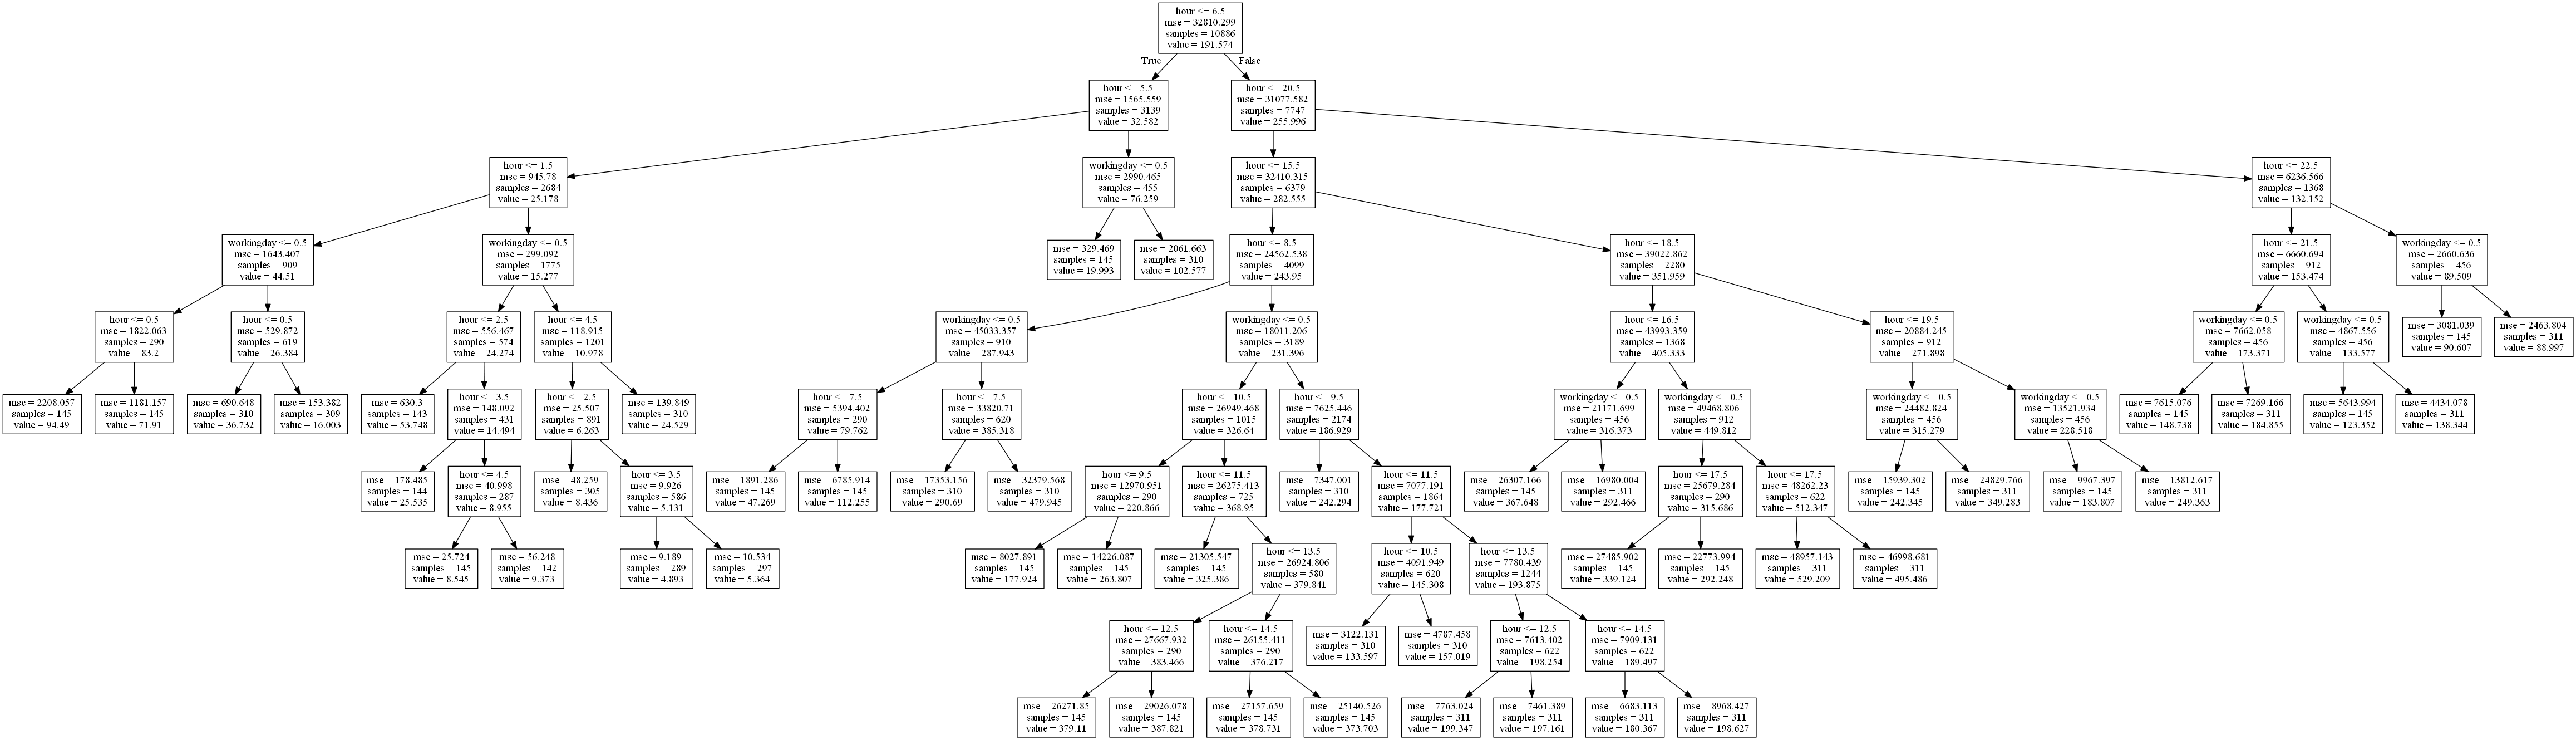

In [80]:
# create a Graphviz file
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
treereg.fit(X, y)
dot_data = tree.export_graphviz(treereg, out_file=None,feature_names =X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Con una profundidad maxima de 10, se obtuvo un RMSE de 106, menor al eror obtenido en la regresión lineal.